In [64]:
import matplotlib.pyplot as plt
# Descriptive Plots - Boxplot, Density etc.
import seaborn as sns
import pandas as pd
import numpy as np

In [65]:
titanic_data=pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Titanic_Data.csv')

In [66]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **DATA WRANGLING**

Count of missing values

In [67]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
titanic_data.shape

(891, 12)

In [69]:
#dropna not to be used as it drops entire row and here large no of rows have missing values

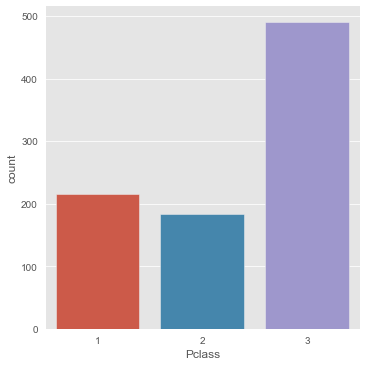

In [70]:
plt.style.use('ggplot')
sns.catplot(x='Pclass',kind='count',data=titanic_data)

In [71]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

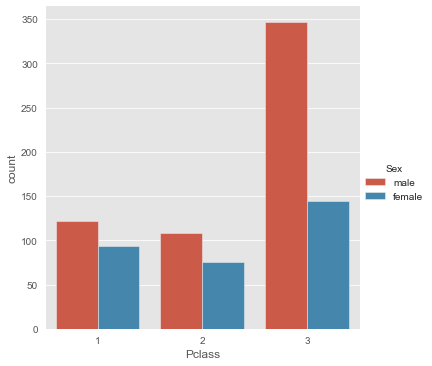

In [72]:
plt.style.use('ggplot')
sns.catplot(x='Pclass',kind='count',hue='Sex',data=titanic_data)

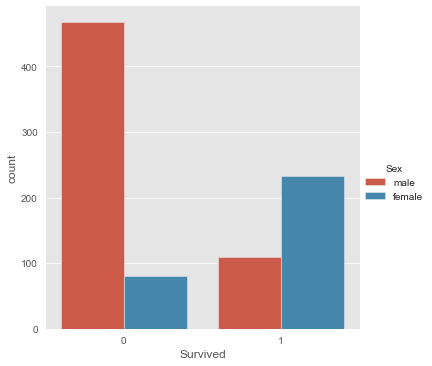

In [73]:
plt.style.use('ggplot')
sns.catplot(x='Survived',kind='count',hue='Sex',data=titanic_data)

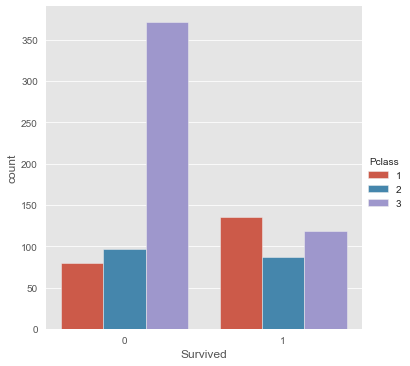

In [74]:
plt.style.use('ggplot')
sns.catplot(x='Survived',kind='count',hue='Pclass',data=titanic_data)

# **HANDLING MISSING VALUES**
- Replace by mean or median
- Replace by mean of sample if its continous
- Replace by median of sample if its a discrete data

In [75]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

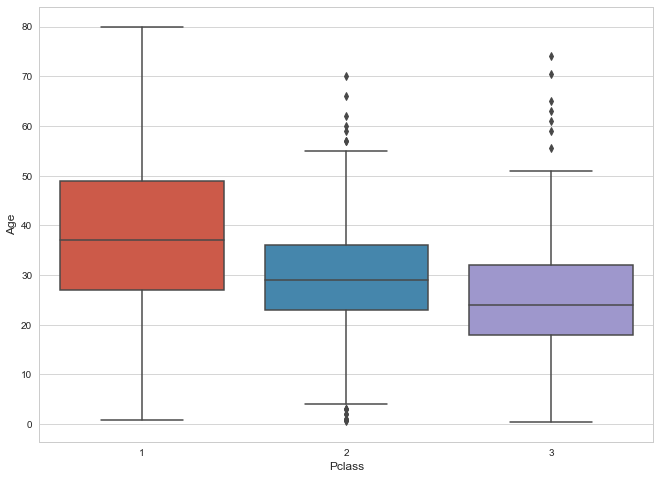

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [77]:
print(titanic_data[titanic_data['Pclass']==1]['Age'].median())
print(titanic_data[titanic_data['Pclass']==2]['Age'].median())
print(titanic_data[titanic_data['Pclass']==3]['Age'].median())

37.0
29.0
24.0


# SIMPLE IMPUTER
- Replacing missing value by Median

In [78]:
def imputer_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age


In [79]:
# .apply(function name) => modify or apply changes in data frames
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(imputer_age,axis=1)

In [80]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
titanic_data.drop('Cabin',axis=1,inplace=True)
titanic_data.dropna(inplace=True)

In [82]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [83]:
# One hot Encoding
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [84]:
embarked=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [85]:
titanic_df=pd.concat([titanic_data,sex,embarked],axis=1)

In [86]:
titanic_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titanic_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:>

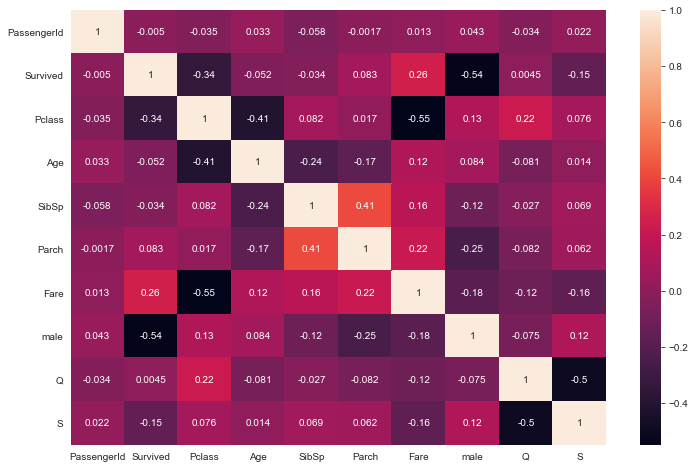

In [87]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic_df.corr(),annot=True)

In [91]:
x=titanic_df.drop(['PassengerId','Survived'],axis=1)
y=titanic_df['Survived']

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

# Logistic Regression Model

In [97]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(C=1e6,max_iter=1e9,solver='saga',random_state=0 )
logit_model.fit(x_train,y_train)

LogisticRegression(C=1000000.0, max_iter=1000000000.0, random_state=0,
                   solver='saga')

In [94]:
logit_model.score(x_test,y_test)

0.8651685393258427

# **Classification Metrics**


In [99]:
predictions=logit_model.predict(x_test)
predictions

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [103]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,predictions)

array([[110,   9],
       [ 16,  43]], dtype=int64)

<AxesSubplot:>

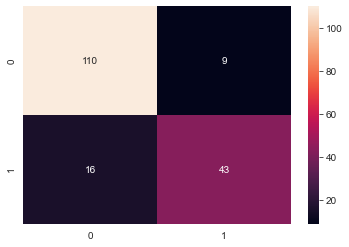

In [104]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True,fmt='0.0f')

In [1]:
print(classification_report(y_test,predictions))

NameError: name 'classification_report' is not defined